In [5]:
import numpy as np 
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt


In [6]:
'''Test of the SMC sampler on the banana distribution. The M-Kernel is a simple Metropolis step. L-Kernel is chosen as the time reversal of M so 
the weights reduce to the simple ratio. The tempering schedule is a simple linear schedule 0<beta<1. 
Note that due to the invariance of M the weights depend only on the old particles.'''

'Test of the SMC sampler on the banana distribution. The M-Kernel is a simple Metropolis step. L-Kernel is chosen as the time reversal of M so \nthe weights reduce to the simple ratio. The tempering schedule is a simple linear schedule 0<beta<1. \nNote that due to the invariance of M the weights depend only on the old particles.'

In [7]:
rng = np.random.default_rng()

b = 5
sigma = 1
def log_P(X:np.array):
    return (-(X[...,0]**2 + (X[...,1]- b * (X[...,0]**2 - sigma**2)))**2)/2

##Define the sequence of intermediate targets
beta_t = np.linspace(0,1,20)


In [8]:
##Algorithm

#Initial proposal particles
N = 10000
particles = rng.multivariate_normal(np.array([0,0]),5 * np.eye(2),size = (N,))
weights = 1/N * np.ones(N)

beta_t1 = 0
for t,beta in enumerate(beta_t[1:]):
    print(f"Time step: {t}")

    #Resampling step
    indices = rng.choice(np.arange(N),size = N,replace = True, p = weights)
    particles = particles[indices,:]

    old_particles = particles.copy()
    
    sub_steps = 20
    scale_param = 1.0
    #Mutation/M-Kernel step
    #MCMC step targeting the intermediate distribution of interest P**beta
    for step in range(sub_steps):
        for p in particles: 
            proposal = p + scale_param * rng.multivariate_normal(np.zeros(2),np.eye(2))
            A = beta * log_P(proposal) - beta * log_P(p)
            if(A >= 0):
                p = proposal 
            else: 
                u = rng.uniform(0.,1.)
                if(np.log(u) < A): 
                    p = proposal

    
    #Compute weights
    #weights = (beta * log_P(old_particles))-(beta_t1 * log_P(old_particles))
    weights = log_P(old_particles)
    
    # #Normalize weights
    weights = np.exp(weights)
    weights /= np.sum(weights)

    # #Track the previous beta
    beta_t1 = beta

Time step: 0
Time step: 1
Time step: 2
Time step: 3
Time step: 4
Time step: 5
Time step: 6
Time step: 7
Time step: 8
Time step: 9
Time step: 10
Time step: 11
Time step: 12
Time step: 13
Time step: 14
Time step: 15
Time step: 16
Time step: 17
Time step: 18


In [9]:
indices = rng.choice(np.arange(N),size = N,replace = True, p = weights)
particles = particles[indices,:]

mean_estimate = np.mean(particles,axis = 0)
cov_estimate = np.cov(particles.T)

print(f"Estimate of the mean: {mean_estimate}")
print(f"Estimate of the Cov: {cov_estimate}")

Estimate of the mean: [ 0.06450071 -0.682646  ]
Estimate of the Cov: [[ 1.06903346 -0.12781196]
 [-0.12781196  4.84956669]]


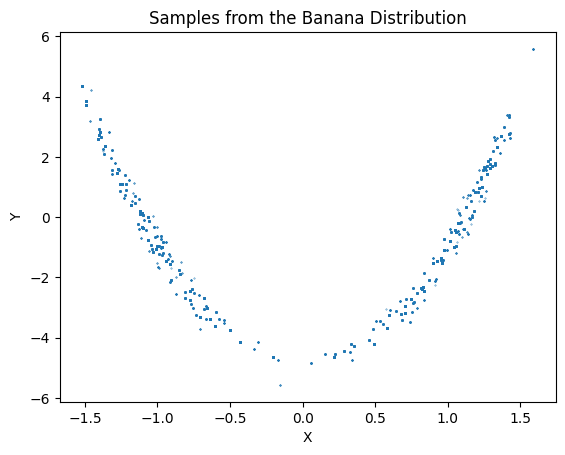

In [10]:
plt.title('Samples from the Banana Distribution')
plt.xlabel('X')
plt.ylabel('Y')

plt.scatter(particles[:,0],particles[:,1],s = 0.1)